In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid", palette="muted", font_scale=1.1)


df = pd.read_csv("Ames_Housing.csv")

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()

Dataset loaded successfully!
Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
# Basic info
df.info()

# Quick statistics
df.describe().T

# Check missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Cond,159
Garage Yr Blt,159


In [ ]:
# Simple handling strategy: fill numeric NaN with median, categorical with mode
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("Encoded shape:", df_encoded.shape)

Encoded shape: (2930, 263)


/tmp/ipython-input-785255517.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-785255517.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
# Target variable (dependent variable)
y = df_encoded["SalePrice"]

# Drop target and IDs from features
X = df_encoded.drop(["SalePrice", "Order"], axis=1, errors='ignore')

print("Features:", X.shape[1])

Features: 261


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 2344
Testing samples: 586


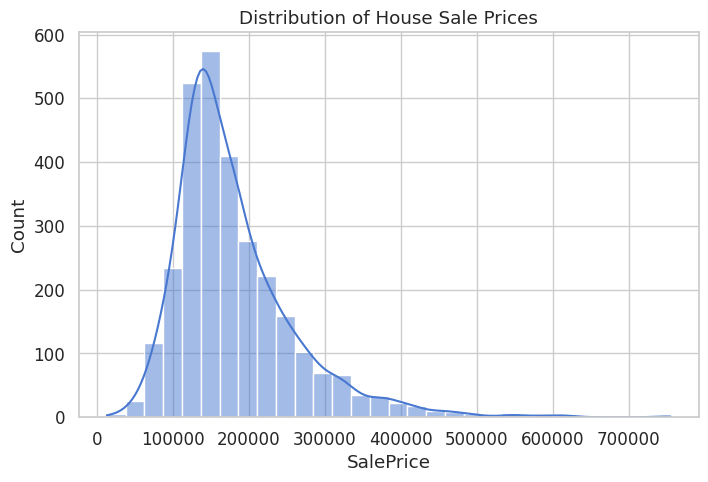

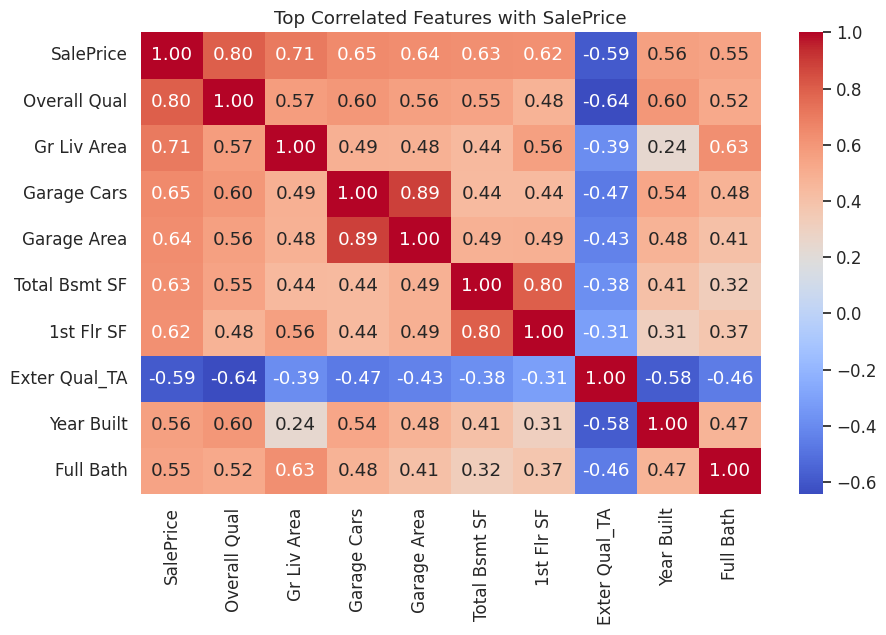

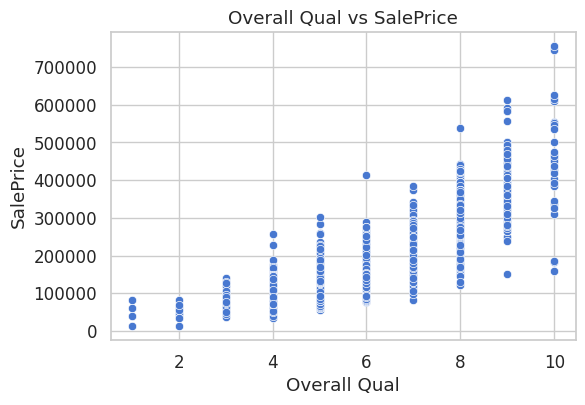

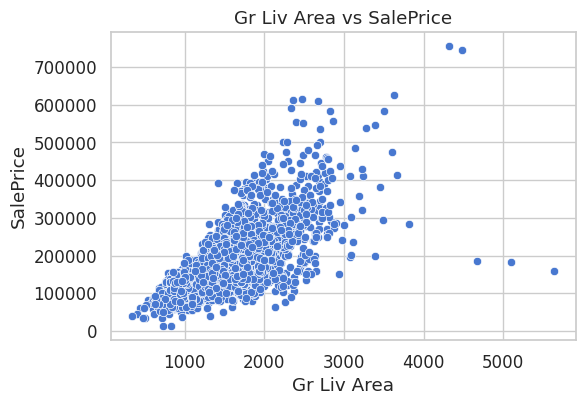

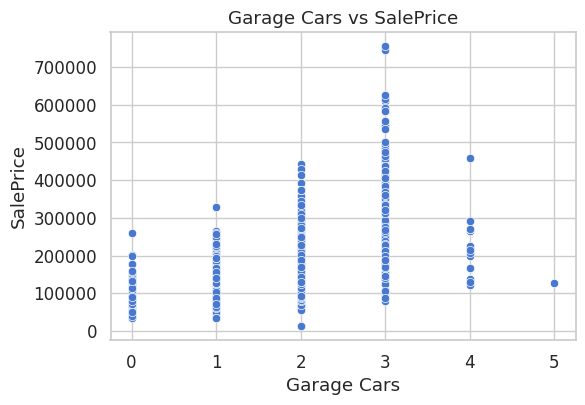

In [ ]:
# Histogram of SalePrice
plt.figure(figsize=(8,5))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of House Sale Prices")
plt.show()

# Correlation heatmap for top 10 correlated features
corr = df_encoded.corr()
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded[top_corr].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.show()

# Scatter plots for a few top predictors
top_features = [f for f in top_corr if f != "SalePrice"][:3]
for f in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_encoded[f], y=y)
    plt.title(f"{f} vs SalePrice")
    plt.show()

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)

print(f"Linear Regression — RMSE: {rmse_lin:.2f}, R²: {r2_lin:.3f}")

Linear Regression — RMSE: 36122.65, R²: 0.837


In [ ]:
# Select top correlated numerical columns for simplicity
num_cols = [col for col in top_corr if col != "SalePrice"]

X_poly = df_encoded[num_cols]
y_poly = df_encoded["SalePrice"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y_poly, test_size=0.2, random_state=42
)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.transform(X_test_p)

lin_poly = LinearRegression()
lin_poly.fit(X_train_poly, y_train_p)

y_pred_poly = lin_poly.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test_p, y_pred_poly))
r2_poly = r2_score(y_test_p, y_pred_poly)

print(f"Polynomial Regression (deg=2) — RMSE: {rmse_poly:.2f}, R²: {r2_poly:.3f}")

Polynomial Regression (deg=2) — RMSE: 34108.49, R²: 0.855


In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest — RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

Random Forest — RMSE: 26886.72, R²: 0.910


In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Random Forest"],
    "RMSE": [rmse_lin, rmse_poly, rmse_rf],
    "R²": [r2_lin, r2_poly, r2_rf]
})

results.sort_values(by="R²", ascending=False).reset_index(drop=True)

,Model,RMSE,R²
0,Random Forest,26886.723879,0.909836
1,Polynomial Regression,34108.485001,0.854895
2,Linear Regression,36122.648197,0.837251


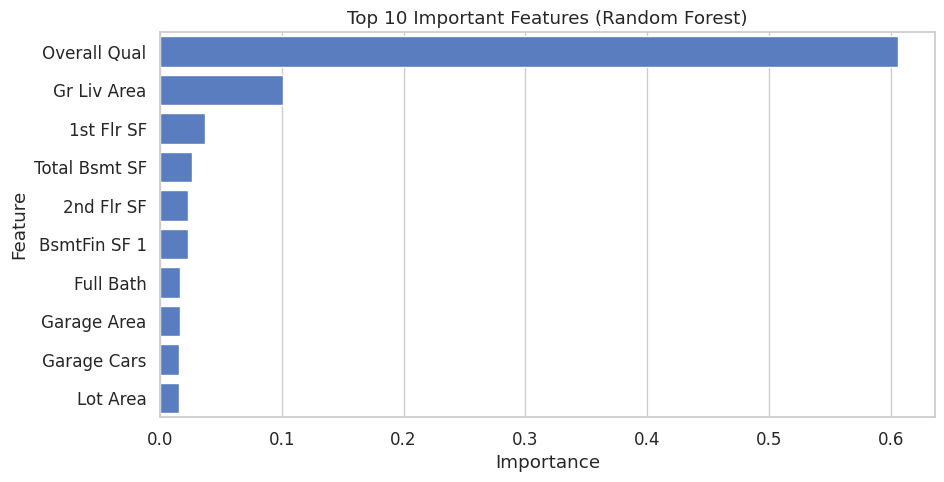

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()